In [1]:
import torch
from PIL import Image
from utils import plot_preds
from utils import get_sport_dataloader, fit, transform_test
from model import SportsClassification

In [2]:
# Define the dataloader, args, deep model. And train, val, save it.
train_loader, val_loader, test_loader, classes = get_sport_dataloader(batch_size=32)
class_number = 100
model=SportsClassification(class_number).cuda()
model.load_state_dict(torch.load("resnet50_model.pth"))
history=[]
epoch=30
lr=0.001
weight_decay=1e-4
grad_clip=0.1
opt=torch.optim.Adam
history=fit(model,epoch,lr,train_loader,val_loader,weight_decay,grad_clip,opt)
torch.save(model.state_dict(),"resnet50_model.pth")

13572 500 500


  0%|          | 0/425 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

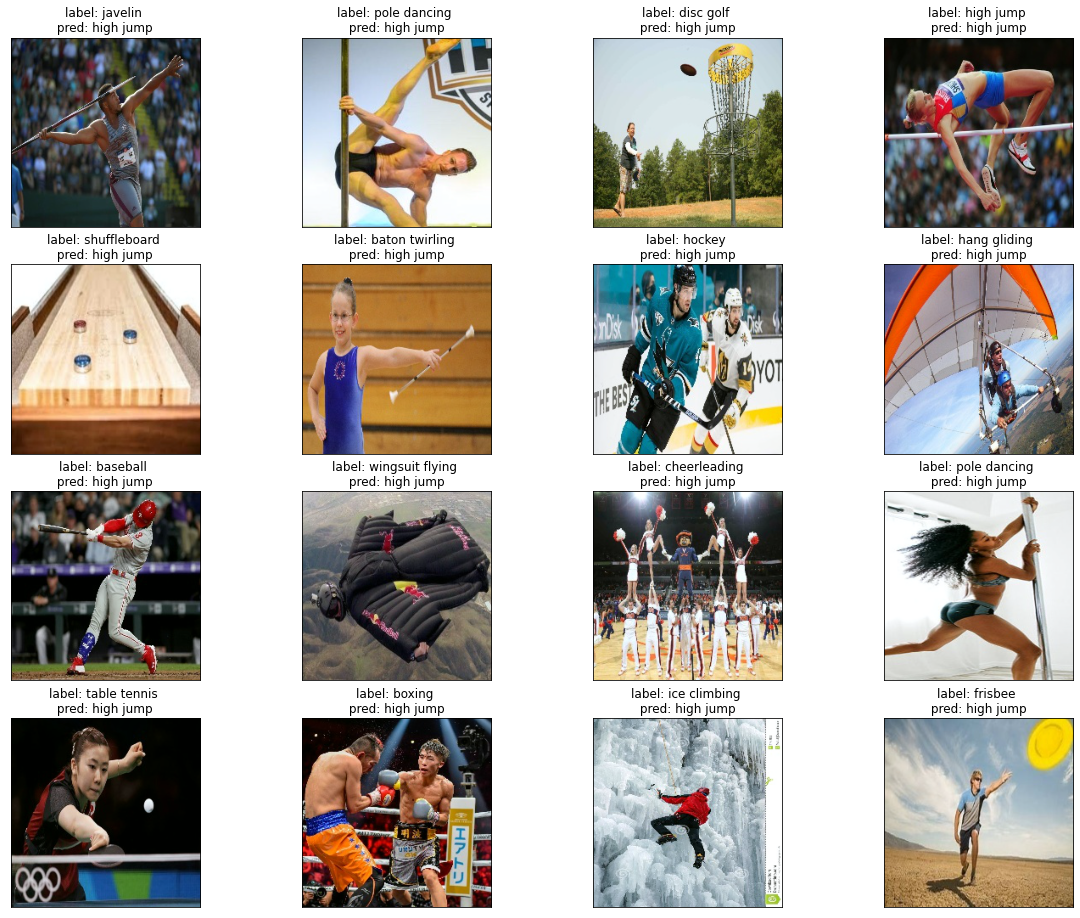

In [2]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T
class_number = 100
model=SportsClassification(class_number).cuda()
model.load_state_dict(torch.load("resnet50_model.pth"))
std=torch.Tensor([0.4687, 0.4667, 0.4540])
mean=torch.Tensor([0.2792, 0.2717, 0.2852])
v_trans=T.Compose([T.ToTensor(), T.Normalize(mean,std)])
test_set=ImageFolder("../dataset/sport_dataset/test",transform=v_trans)
plot_preds(test_set, model)

In [ ]:
# use the saved model to predict a sport
class_number = 100
_, _, _, classes = get_sport_dataloader(batch_size=32)
model=SportsClassification(class_number).cuda()
model.load_state_dict(torch.load("resnet50_model.pth"))
img1 = transform_test(Image.open('./image/ice hockey.jpg'))
img2 = transform_test(Image.open('./image/ski.jpg'))
img3 = transform_test(Image.open('./image/speed skating.jpg'))
img4 = transform_test(Image.open('./image/figure skating.jpg'))
imgs= [img1, img2, img3, img4]
plot_preds(model, imgs, classes)